In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("Train shape : ",train_df.shape)
print("Test shape : ",test_df.shape)

Train shape :  (5279, 4)
Test shape :  (2924, 3)


In [37]:
train_df.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [12]:
train_df['sentiment'].value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

In [10]:
train_df['drug'].value_counts().head(20)

ocrevus        676
gilenya        666
ocrelizumab    441
entyvio        303
humira         270
fingolimod     238
remicade       229
opdivo         224
tarceva        218
cladribine     200
keytruda       199
tagrisso       161
stelara        161
alimta         146
lucentis        67
eylea           65
avastin         52
nivolumab       50
cimzia          48
alectinib       43
Name: drug, dtype: int64

In [21]:
freq_drugs = train_df['drug'].value_counts().head(20).index.values
freq_drugs = list(freq_drugs)
freq_drugs

['other',
 'ocrevus',
 'gilenya',
 'ocrelizumab',
 'entyvio',
 'humira',
 'fingolimod',
 'remicade',
 'opdivo',
 'tarceva',
 'cladribine',
 'keytruda',
 'tagrisso',
 'stelara',
 'alimta',
 'lucentis',
 'eylea',
 'avastin',
 'nivolumab']

In [22]:
train_df['drug'] = train_df['drug'].apply(lambda x: x if x in freq_drugs else 'other')
test_df['drug'] = test_df['drug'].apply(lambda x: x if x in freq_drugs else 'other')
display(train_df['drug'].value_counts())
test_df['drug'].value_counts()

other          913
ocrevus        676
gilenya        666
ocrelizumab    441
entyvio        303
humira         270
fingolimod     238
remicade       229
opdivo         224
tarceva        218
cladribine     200
keytruda       199
tagrisso       161
stelara        161
alimta         146
lucentis        67
eylea           65
avastin         52
nivolumab       50
Name: drug, dtype: int64

other          581
gilenya        311
ocrevus        302
humira         188
entyvio        183
remicade       174
ocrelizumab    161
opdivo         130
tarceva        126
tagrisso       125
keytruda       115
stelara        106
fingolimod     105
cladribine     100
alimta          83
lucentis        47
eylea           33
avastin         31
nivolumab       23
Name: drug, dtype: int64

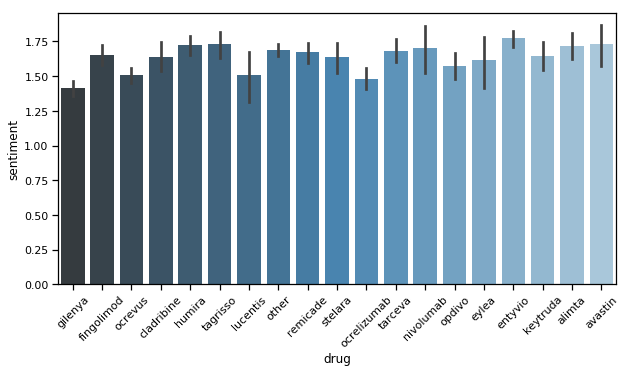

In [34]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(x='drug', y='sentiment', data=train_df, palette=("Blues_d"))

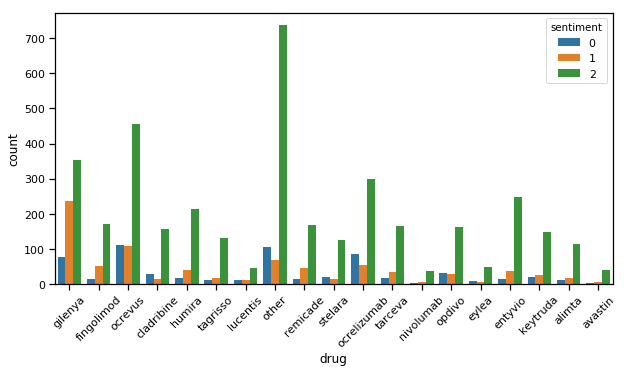

In [36]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(x="drug", hue="sentiment", data=train_df)

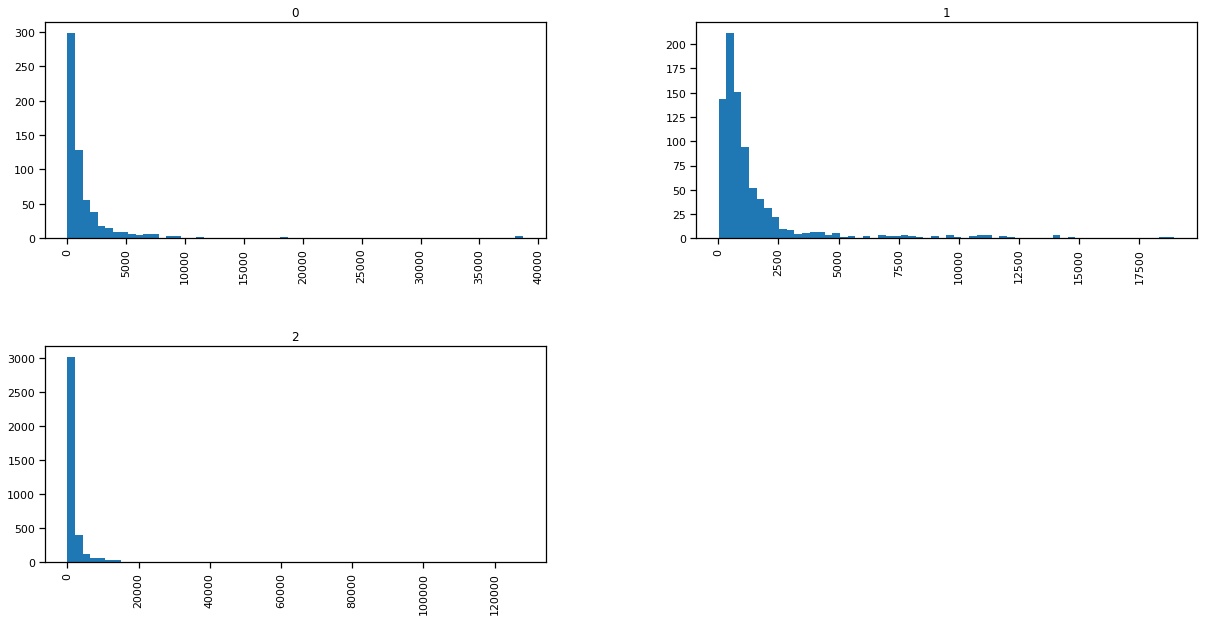

In [41]:
train_df['length'] = train_df['text'].apply(len)
train_df.hist(column='length',by='sentiment',bins=60,figsize=(20,10));

In [43]:
data_0 = train_df[train_df['sentiment'] == 0].copy()
data_1 = train_df[train_df['sentiment'] == 1].copy()
data_2 = train_df[train_df['sentiment'] == 2].copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002287D33F1D0>]],
      dtype=object)

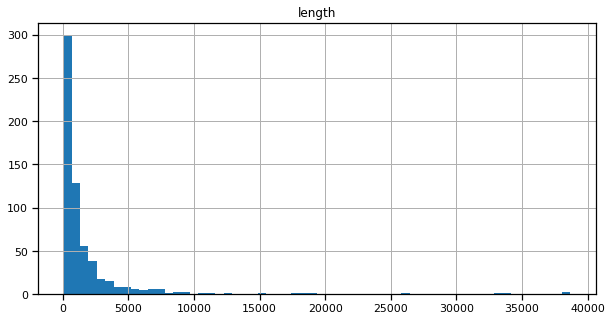

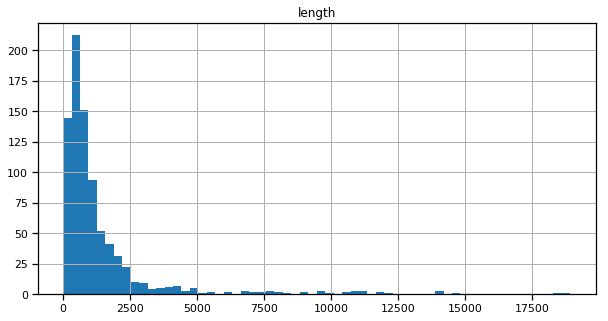

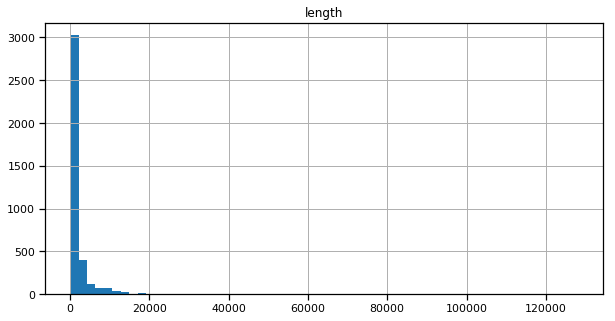

In [45]:
data_0.hist(column='length', bins=60,figsize=(10,5))
data_1.hist(column='length', bins=60,figsize=(10,5))
data_2.hist(column='length', bins=60,figsize=(10,5))

In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import string

In [47]:
def remove_punctuation_and_stopwords(sms):
    
    no_punct = [ch for ch in sms if ch not in string.punctuation]
    no_punct = "".join(no_punct).split()
    
    no_punct_stop = \
        [word.lower() for word in no_punct if word.lower() not in stopwords.words("english")]
        
    return no_punct_stop

In [52]:
train_df['text'] = train_df['text'].apply(remove_punctuation_and_stopwords)
test_df['text'] = test_df['text'].apply(remove_punctuation_and_stopwords)
train_df.head()

,unique_hash,text,drug,sentiment,length
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"[autoimmune, diseases, tend, come, clusters, g...",gilenya,2,404
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"[completely, understand, you’d, want, try, res...",gilenya,2,1184
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"[interesting, targets, s1p15, receptors, rathe...",fingolimod,2,780
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"[interesting, grand, merci, wonder, lemtrada, ...",ocrevus,2,124
4,b227688381f9b25e5b65109dd00f7f895e838249,"[hi, everybody, latest, mri, results, brain, c...",gilenya,1,612


In [64]:
data_0 = train_df['text'][train_df['sentiment'] == 0].copy().tolist()
data_1 = train_df['text'][train_df['sentiment'] == 1].copy().tolist()
data_2 = train_df['text'][train_df['sentiment'] == 2].copy().tolist()

In [69]:
from collections import Iterable                            # < py38


def flatten(items):
    """Yield items from any nested iterable; see Reference."""
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            for sub_x in flatten(x):
                yield sub_x
        else:
            yield x

merged0 = list(flatten(data_0))
merged1 = list(flatten(data_1))
merged2 = list(flatten(data_2))

In [72]:
fdist_0  = nltk.FreqDist(merged0)
fdist_1  = nltk.FreqDist(merged1)
fdist_2  = nltk.FreqDist(merged2)

df_fdist_0 = pd.DataFrame(fdist_0.most_common(30),  columns=['word', 'count'])
df_fdist_1 = pd.DataFrame(fdist_1.most_common(30),  columns=['word', 'count'])
df_fdist_2 = pd.DataFrame(fdist_2.most_common(30),  columns=['word', 'count'])

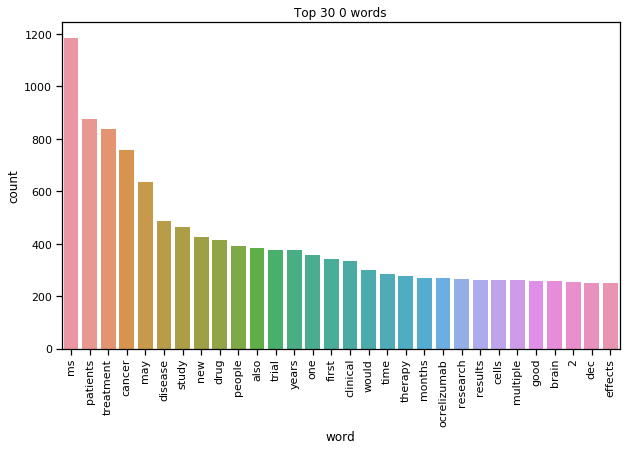

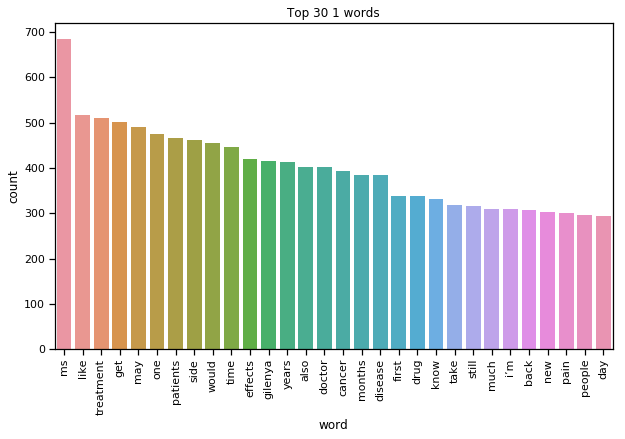

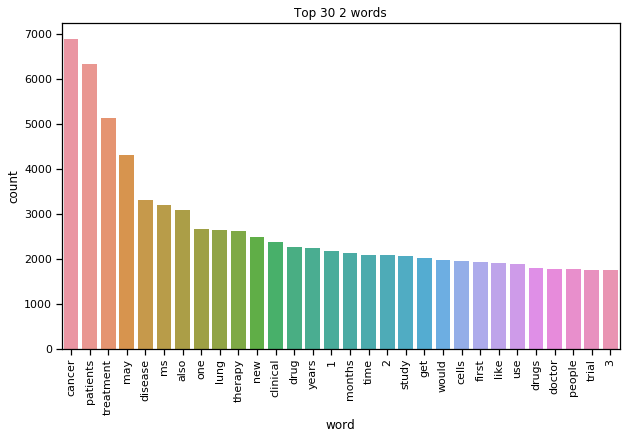

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Top 30 0 words")
plt.xticks(rotation='vertical')
sns.barplot(x='word', y='count', 
            data=df_fdist_0, ax=ax)

fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Top 30 1 words")
plt.xticks(rotation='vertical')
sns.barplot(x='word', y='count', 
            data=df_fdist_1, ax=ax)

fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Top 30 2 words")
plt.xticks(rotation='vertical')
sns.barplot(x='word', y='count', 
            data=df_fdist_2, ax=ax)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(train_df['text'])

In [85]:
print(len(bow_transformer.vocabulary_))

53778


In [86]:
bow_data = bow_transformer.transform(train_df['text'])
bow_test = bow_transformer.transform(test_df['text'])

primeiro bow


In [90]:
print( bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]) *100 )

0.22369788065521426


In [91]:
print( bow_test.nnz / (bow_test.shape[0] * bow_test.shape[1]) *100 )

0.23778978573258994


In [92]:
from sklearn.feature_extraction.text import TfidfTransformer

In [97]:
tfidf_transformer = TfidfTransformer().fit(bow_data)
tfidf_transformer_test = TfidfTransformer().fit(bow_test)

In [98]:
data_tfidf = tfidf_transformer.transform(bow_data)
data_tfidf_test = tfidf_transformer.transform(bow_test)

In [101]:
data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, train_df["sentiment"], test_size=0.3, random_state=42)

In [106]:
data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

In [109]:
scaler = MinMaxScaler()
data_tfidf_train_sc = scaler.fit_transform(data_tfidf_train)
data_tfidf_test_sc  = scaler.transform(data_tfidf_test)

In [110]:
parameters_KNN = {'n_neighbors': (10,15,17), }

grid_KNN = GridSearchCV( KNeighborsClassifier(), parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)

grid_KNN.fit(data_tfidf_train_sc, label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


MemoryError: 

In [ ]:
print(grid_KNN.best_params_)
print(grid_KNN.best_score_)

In [111]:
pipe_SGD = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SGD' , SGDClassifier(random_state=5)),
                    ])

parameters_SGD = {
    #'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'clf_SGD__max_iter': (5,10),
    'clf_SGD__alpha': (1e-05, 1e-04),
}

grid_SGD = GridSearchCV(pipe_SGD, parameters_SGD, cv=5,
                               n_jobs=-1, verbose=1)

grid_SGD.fit(X=data_tfidf_train_sc, y=label_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


MemoryError: 

In [ ]:
print(grid_SGD.best_params_)
print(grid_SGD.best_score_)

In [113]:
#direct from text
from sklearn.model_selection import train_test_split

onlytext_train, onlytext_test, label_train, label_test = \
    train_test_split(train_df["text"], train_df["sentiment"], test_size=0.3, random_state=42)

In [115]:
pipe_GBC = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                      ('tfidf'   , TfidfTransformer() ),
                      ('clf_GBC' , GradientBoostingClassifier(random_state=42) ),
                    ])

parameters_GBC = { 'tfidf__use_idf': (True, False), 
                   'clf_GBC__learning_rate': (0.1, 0.2),
                   #'clf_GBC__min_samples_split': (3,5), 
                 }

grid_GBC = GridSearchCV(pipe_GBC, parameters_GBC, 
                        cv=3, n_jobs=-1, verbose=1)

grid_GBC.fit(X=onlytext_train, y=label_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 55.4min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 55.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x000002286DE28EA0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'tfidf__use_idf': (True, False), 'clf_GBC__learning_rate': (0.1, 0.2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [116]:
print(grid_GBC.best_params_)
print(grid_GBC.best_score_)

{'clf_GBC__learning_rate': 0.1, 'tfidf__use_idf': True}
0.7234100135317997


In [117]:
predict = grid_GBC.predict(onlytext_test)

In [119]:
print(metrics.classification_report(predict, label_test))

              precision    recall  f1-score   support

           0       0.01      0.20      0.01         5
           1       0.06      0.48      0.11        33
           2       0.99      0.73      0.84      1546

   micro avg       0.72      0.72      0.72      1584
   macro avg       0.35      0.47      0.32      1584
weighted avg       0.96      0.72      0.82      1584



In [120]:
print(metrics.confusion_matrix(predict,label_test))

[[   1    0    4]
 [   5   16   12]
 [ 167  253 1126]]


In [123]:
1546/1584

0.976010101010101